If you have yielded outputs in Step 3, example materials for this notebook can be downloaded:
* Res4a_ReLU features of <a href="https://drive.google.com/drive/u/1/folders/18Rj3URj3aGRc93V_NLvD2247PcPsdZoa">annotated dataset</a>
* Res4a_ReLU features of <a href="https://drive.google.com/drive/u/1/folders/15RtyL3sLdxM2_RTZ8ucxg6H4MUAQs9_T">unannotated dataset</a>

Retrieve and place the files into *'../Data/Step3/Output/'* folder.

# ------------- User's settings -------------
This is the only section you need to make inputs

In [1]:
input_directory_annotated = '../Data/Step3/Output/Annotated'

input_directory_unannotated = '../Data/Step3/Output/Unannotated'
test_bags = ['CE47', 'CE49']
test_dates = ['D2', 'D14', 'D42']

output_directory_annotated = '../Data/Step4/Output/Annotated'
output_directory_unannotated = '../Data/Step4/Output/Unannotated'

In [2]:
selected_layers = ['res4a_relu', 'res5a_relu', 'pool5']
selected_layer_train = 'res4a_relu'

In [3]:
dictionary = {
    0: 'Crenated Disc',
    1: 'Crenated Discoid',
    2: 'Crenated Sphere',
    3: 'Crenated Spheroid',
    4: 'Side',
    5: 'Smooth Disc',
    6: 'Smooth Sphere'
}

In [4]:
ordered_classes = [
    'Smooth Disc',    
    'Crenated Disc',
    'Crenated Discoid',
    'Crenated Spheroid',
    'Crenated Sphere',    
    'Smooth Sphere',
    'Side'   
]

In [5]:
# If using Conda, specifying the path for Python site-packages might be needed
import sys
# sys.path.insert(0, '/home/user/.conda/envs/env_names/lib/python3.6/site-packages')

# ------------- Executable -------------
Execute the rest of the script

In [6]:
%matplotlib inline

import umap
import glob
import os.path
import numpy
import pickle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn
import pandas

# UMAP for Annotated Data

In [7]:
X_train = numpy.load(os.path.join(input_directory_annotated, selected_layer_train, str('features_' + selected_layer_train + '.npy')))

In [8]:
if len(X_train.shape) > 2:
    a = numpy.mean(X_train, axis = 1)
    del(X_train)
    X_train = numpy.mean(a, axis = 1)
    print(X_train.shape)

(41715, 1024)


In [9]:
y_train = pickle.load(open(os.path.join(input_directory_annotated,'y.sav'), 'rb'))

1D Umap

In [10]:
reducer_1D = umap.UMAP(n_neighbors=10, n_components=1, random_state=42).fit(X_train)

umap_1D_table = pandas.DataFrame()
umap_1D_table['Umap comp.1'] = reducer_1D.embedding_[:, 0]
umap_1D_table['class'] = [dictionary[i] for i in y_train]

In [11]:
umap_1D_table['class'] = pandas.Categorical(umap_1D_table['class'], ordered_classes)
umap_1D_table = umap_1D_table.sort_values("class")

In [13]:
out_dir = os.path.join(output_directory_annotated, selected_layer_train)
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

numpy.save(os.path.join(output_directory_annotated, selected_layer_train, str('fitted_umap_1D_vector_' + selected_layer_train + '.npy')) , reducer_1D.embedding_)

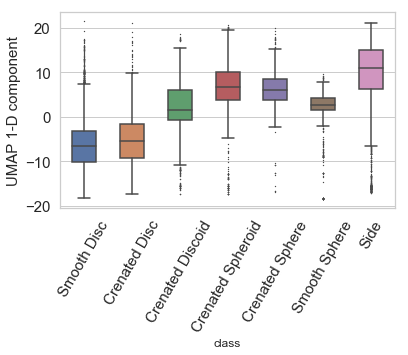

In [14]:
seaborn.set(style="whitegrid")

f, ax = plt.subplots()

seaborn.boxplot(x='class', y='Umap comp.1', data=umap_1D_table, width=0.5, whis=1.5, fliersize=0.5)

plt.xticks(rotation=60, fontsize=15)

plt.yticks(fontsize=15)
# plt.xlim(-24,24)
plt.ylabel('UMAP 1-D component', fontsize=15)
# plt.xlabel('Class', fontsize=30)
# Pad margins so that markers don't get clipped by the axes
# plt.margins(0.3)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.2)

plt.savefig(os.path.join(output_directory_annotated, selected_layer_train,'Boxplot_Umap_1D_b.png'), dpi = 300)

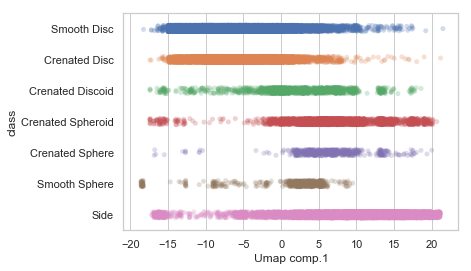

In [15]:
seaborn.set(style="whitegrid")

f, ax = plt.subplots()

seaborn.stripplot(y='class', x='Umap comp.1', data=umap_1D_table, dodge=True, jitter=True, alpha=0.25, zorder=1)
# plt.xticks(rotation=60)
# plt.ylim(-5, 5)

/Users/minhdoan/miniconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '
/Users/minhdoan/miniconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '
/Users/minhdoan/miniconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '
/Users/minhdoan/miniconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes he

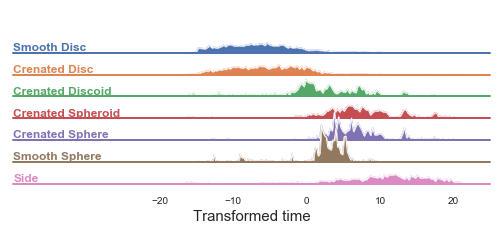

In [16]:
seaborn.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'figure.figsize':(14,10)} )

g = seaborn.FacetGrid(umap_1D_table, row='class', hue='class', aspect=15, height=0.5 )

# Draw the densities in a few steps
g.map(seaborn.kdeplot, 'Umap comp.1', clip_on=False, shade=True, alpha=1, lw=1, bw=0.002)
g.map(seaborn.kdeplot, 'Umap comp.1', clip_on=False, color="w", lw=1, bw=0.002)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes)

g.map(label, 'Umap comp.1')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-0.5)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
# g.set(xlim=[0.35,1.05])
g.despine(bottom=True, left=True)

plt.xlim(-40, 25)
# plt.ylim(0, 16)
plt.xticks(numpy.arange(-20, 25, 10), fontsize=10)
plt.xlabel('Transformed time', fontsize=15)

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.1)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.2)
plt.savefig(os.path.join(output_directory_annotated, selected_layer_train,'Umap_1D.png'), dpi = 300)

2D Umap

In [17]:
reducer_2D = umap.UMAP(n_neighbors=10, n_components=2, random_state=42).fit(X_train)

umap_2D_table = pandas.DataFrame()
umap_2D_table['Umap comp.1'] = reducer_2D.embedding_[:, 0]
umap_2D_table['Umap comp.2'] = reducer_2D.embedding_[:, 1]
umap_2D_table['class'] = [dictionary[i] for i in y_train] 
umap_2D_table['class'] = pandas.Categorical(umap_2D_table['class'], ordered_classes)
umap_2D_table = umap_2D_table.sort_values("class")

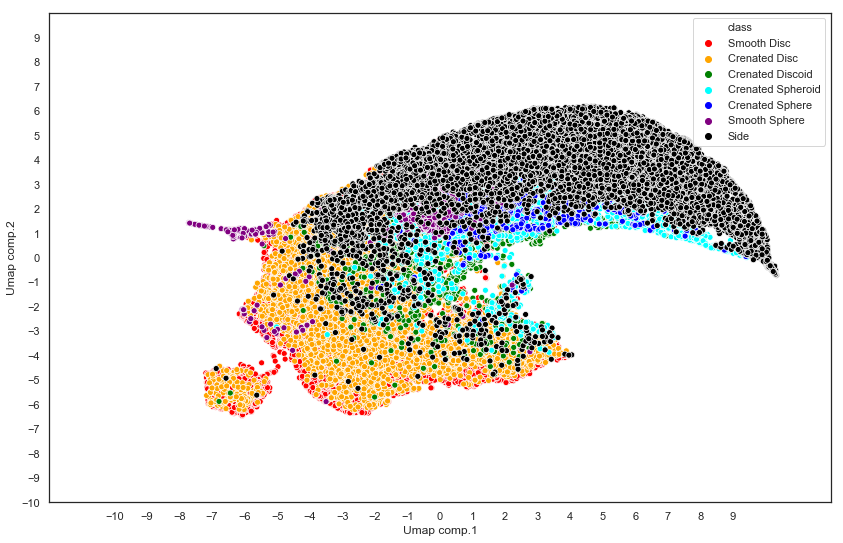

In [20]:
# plot
seaborn.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
fig, ax = plt.subplots()

# Font size
#seaborn.set(font_scale = 1.5)

# Number of ticks in axes
plt.yticks(numpy.arange(-10, 10, 1))
plt.xticks(numpy.arange(-10, 10, 1))

# Axes limit
axes = ax.axes
axes.set_ylim(-10,10)
axes.set_xlim(-12,12)


# Pad margins so that markers don't get clipped by the axes
plt.margins(0.1)

# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.2)

pal = {
    'Smooth Disc': 'red',
    'Crenated Disc': 'orange', 
    'Crenated Discoid': 'green',
    'Crenated Spheroid': 'cyan',
    'Crenated Sphere': 'blue',
    'Smooth Sphere': 'purple',
    'Side': 'black'
}

seaborn.scatterplot(x=umap_2D_table['Umap comp.1'], y=umap_2D_table['Umap comp.2'], hue=umap_2D_table['class'], palette=pal)
plt.savefig(os.path.join(output_directory_annotated, selected_layer_train, 'Umap_2D.png'), dpi = 300)

plt.show()

In [21]:
numpy.save(os.path.join(output_directory_annotated, selected_layer_train, str('fitted_umap_2D_vectors_' + selected_layer_train + '.npy')) , reducer_2D.embedding_)

3D Umap

In [ ]:
reducer_3D = umap.UMAP(n_neighbors=10, n_components=3, random_state=42).fit(X_train)

In [ ]:
numpy.save(os.path.join(output_directory_annotated, selected_layer_train, str('fitted_umap_3D_vectors_' + selected_layer_train + '.npy')) , reducer_3D.embedding_)

# UMAP for Unannotated Data

Fit blindly altogether

In [22]:
# l = 'res4a_relu'
l = selected_layer_train

In [ ]:
altogether = []
for b in test_bags:
    print(b)
    
    for d in test_dates:
    
        directory = os.path.join(input_directory_unannotated, b, d, l)
        
        print('\t',d , l)   

        file = os.path.join(directory, str('features_' + l + '.npy'))

        feature_vectors = numpy.load(file)

        altogether.append(feature_vectors)

In [ ]:
mix_arrays = numpy.empty((len(altogether)*20000,) + feature_vectors.shape[1:])
for i,a in enumerate(altogether):
    mix_arrays[i*20000:(i+1)*20000] = a[:20000]

print(mix_arrays.shape)

In [ ]:
if len(mix_arrays.shape) > 2:
    mixed_a = numpy.mean(mix_arrays, axis = 1)
    del(mix_arrays)
    mix_arrays = numpy.mean(mixed_a, axis = 1)
    print(mix_arrays.shape)

1-D UMAP

In [ ]:
reducer_1D_mixed = umap.UMAP(n_neighbors=10, n_components=1, random_state=42).fit(mix_arrays)
numpy.save(os.path.join(output_directory_unannotated, str('fitted_umap_1D_vector_' + l + '.npy')) , reducer_1D_mixed.embedding_)

2-D UMAP

In [ ]:
# reducer_2D_mixed = umap.UMAP(n_neighbors=10, n_components=2, random_state=42).fit(mix_arrays)
# numpy.save(os.path.join(output_directory_unannotated, str('fitted_umap_2D_vector_' + l + '.npy')) , reducer_2D_mixed.embedding_)

------------- Transform 1D -------------

In [ ]:
for b in testbags:
    print(b)
    
    for d in testdates:
    
        directory = os.path.join(input_directory_unannotated, b, d, l)
   
        print('\t', d)

        file = os.path.join(directory, str('features_' + l + '.npy'))

        feature_vectors = numpy.load(file)

        print('\t', 'Working on file:', os.path.basename(file))

        if len(feature_vectors.shape) > 2:
            a = numpy.mean(feature_vectors, axis = 1)
            del(feature_vectors)
            feature_vectors = numpy.mean(a, axis = 1)

        embedding_1 = reducer_1D_mixed.transform(X=feature_vectors)

        numpy.save(  os.path.join(output_directory_unannotated, str('umap_1D_from_' + l +'_features_'+ d +'_'+ b + '.npy')) , embedding_1)
        del(feature_vectors, embedding_1)